# Assignment 3

In [134]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Task 1: MLE computation

As you know, we can think about linear regression from the optimization point of view (as the problem of minimizing the root mean squared error), but we can also consider it from the probabilistic point of view.
Let's consider the following equation:

\begin{equation*}
y_i=x_i B_0+\varepsilon_i
\end{equation*}

where $y_i$ is the dependent variable, $x_i$ is a $1 \times K$ vector of regressors, $\beta_0$ is the $K \times 1$ vector of regression coefficients to be estimated and $\varepsilon_i$ is an unobservable error term.

The sample is made up of $N$ IID observations $\left(y_i, x_i\right)$.
The regression equations can be also written as

\begin{equation*}
y=X \beta_0+\varepsilon
\end{equation*}

where the $N \times 1$ vector of observations of the dependent variable is denoted by $y$, the $N \times K$ matrix of regressors is denoted by $X$, and the $N \times 1$ vector of error terms is denoted by $\varepsilon$.

As everybody interested in probability theory knows, we always have to have some assumptions. In this case, we assume that the vector of errors $\varepsilon$ has a multivariate normal distribution conditional on $x$, with mean equal to 0 and covariance matrix equal to

\begin{equation*}
\sigma_0^2 I
\end{equation*}

where $l$ is the $N \times N$ identity matrix and

\begin{equation*}
\sigma_0^2=\operatorname{Var}\left[\varepsilon_i \mid X\right]
\end{equation*}

is the second parameter to be estimated.
Furthermore, it is assumed that the matrix of regressors $x$ has full-rank.

Those assumptions have interesting implications:
- the covariance matrix of $\varepsilon$ is diagonal implies that the entries of $\varepsilon$ are mutually independent (i.e., $\varepsilon_i$ is independent of $\varepsilon_j$ for $i \neq j$.)
- they all have a normal distribution with mean 0 and variance $\sigma_0^2$.

The fact that we transform normal random variables linearly makes the dependent variable $y_i$ conditionally normal, with mean $x_i \beta_0$ and variance $\sigma_0^2$. Therefore, its cdf is

\begin{equation*}
f_Y\left(y_i \mid X\right)=\left(2 \pi \sigma_0^2\right)^{-1 / 2} \exp \left(-\frac{1}{2} \frac{\left(y_i-x_i \beta_0\right)^2}{\sigma_0^2}\right)
\end{equation*}

Having this probability model we can use it to do estimation of regression parameters using Maximum Likelihood Estimation method.

The first-order conditions for a maximum are

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2 ; y, X\right)=0 \\
& \frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right)=0
\end{aligned}
\end{equation*}

where $\nabla_\beta$ indicates the gradient calculated with respect to $\beta$, that is, the vector of the partial derivatives of the log-likelihood with respect to the entries of $\beta$. The gradient is

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2: y, X\right) \\
= & \nabla_\beta\left(-\frac{N}{2} \ln (2 \pi)-\frac{N}{2} \ln \left(\sigma^2\right)-\frac{1}{2 \sigma^2} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2\right) \\
= & \frac{1}{\sigma^2} \sum_{i=1}^N x_i^{\top}\left(y_i-x_i \beta\right) \\
= & \frac{1}{\sigma^2}\left(\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta\right)
\end{aligned}
\end{equation*}

which is equal to zero only if

\begin{equation*}
\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta=0
\end{equation*}


Therefore, the first of the two equations is satisfied if

\begin{equation*}
\beta=\left(\sum_{i=1}^N x_i^{\top} x_i\right)^{-1} \sum_{i=1}^N x_i^{\top} y_i=\left(X^{\top} X\right)^{-1} X^{\top} y
\end{equation*}

where we have used the assumption that $x$ has full rank and, as a consequence, $x^x x$ is invertible.


### Subtask A:
Prove that the MLE for variance is equal to
$$
\widehat{\sigma}_n^2=\frac{1}{N} \sum_{i=1}^N\left(y_i-x_i \widehat{\beta}_N\right)^2
$$


$$ 
\frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right)=0 
$$

\begin{equation*}
\begin{aligned}
& \frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right) \\
= & \frac{\partial}{\partial \sigma^2} \left(-\frac{N}{2} \ln (2 \pi)-\frac{N}{2} \ln \left(\sigma^2\right)-\frac{1}{2 \sigma^2} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2\right) \\
= & -\frac{N}{2 \sigma^2}+\frac{1}{2 \sigma^4} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2 \\
= & \frac{1}{2 \sigma^4} \left(\sum_{i=1}^N\left(y_i-x_i \beta\right)^2-N \sigma^2\right) \\
= & \frac{1}{2 \sigma^4} \left((y-X \beta)^{\top}(y-X \beta)-N \sigma^2\right) \\
\end{aligned}
\end{equation*}

which is equal to zero only if  

\begin{equation*}
\sum_{i=1}^N\left(y_i-x_i \beta\right)^2-N \sigma^2=0
\end{equation*}

thus

\begin{equation*}
\sigma^2=\frac{1}{N} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2
\end{equation*}

### MLE for Logistic regression

In the logistic regression model, the output variable $y_i$ is a Bernoulli random variable (it can take only two values, either 1 or 0 ) and

\begin{equation*}
\mathrm{P}\left(y_i=1 \mid x_i\right)=S\left(x_i \beta\right)
\end{equation*}

where

\begin{equation*}
S(t)=\frac{1}{1+\exp (-t)}
\end{equation*}

is the logistic function, $x_i$ is a $1 \times K$ vector of inputs and $\beta$ is a $K \times 1$ vector of coefficients.

Furthermore,

\begin{equation*}
\mathrm{P}\left(y_i=0 \mid x_i\right)=1-S\left(x_i \beta\right)
\end{equation*}


The vector of coefficients $\beta$ is the parameter to be estimated by maximum likelihood.
We assume that the estimation is carried out with an IID sample comprising $N$ data points

\begin{equation*}
\left(y_i, x_i\right) \text { for } i=1, \ldots, N
\end{equation*}

### Subtask B
1. Find the form of the loglikelihood.
2. Compute the gradient of logistic function with respect to $\beta$

You can either tex your solution and put it in this notebook or attach photos of your solution.


#### 1. Find the form of the loglikelihood.

$$ P(y \mid x; \beta) = S(x\beta)^y (1-S(x\beta)^{1-y}) $$

$$ L(\beta) = P(y | x;\beta) $$
$$ = \prod_{i=1}^m P(y_i | x_i; \beta) $$
$$ = \prod_{i=1}^m S(x_i\beta)^{y_i} (1-S(x_i\beta)^{1-y_i}) $$

$$ l(\beta) = \ln L(\beta) $$
$$ = \ln \prod_{i=1}^m S(x_i\beta)^{y_i} (1-S(x_i\beta)^{1-y_i}) $$
$$ = \sum_{i=1}^m \ln S(x_i\beta)^{y_i} (1-S(x_i\beta)^{1-y_i}) $$
$$ = \sum_{i=1}^m y_i \ln S(x_i\beta) + (1-y_i) \ln (1-S(x_i\beta)) $$

We will maximize log likelihood (using gradient ascent) to find the best $\beta$.

#### 2. Compute the gradient of logistic function with respect to $\beta$
$$ \frac{\partial S(x\beta)}{\partial \beta} = \frac{\partial}{\partial \beta} \left(\frac{1}{1+\exp (-x\beta)}\right) $$
$$ = -\frac{1}{(1+\exp(-x\beta))^2} \frac{\partial}{\partial \beta}\exp(-x\beta) $$
$$ = \frac{\exp(-x\beta) x}{(1+\exp(-x\beta))^2} $$


## Task 2: Implement Logistic Regression

Use derivations form previous task to perform logistic regression. Provide a custom implemntation of gradient descent for this taks.
**Bonus points** provide also implementation of other optimization algorithm of your choice, eg. Newton-Rhapson method.


Gradient Descent Accuracy: 0.98125
Newton-Raphson Accuracy: 0.985


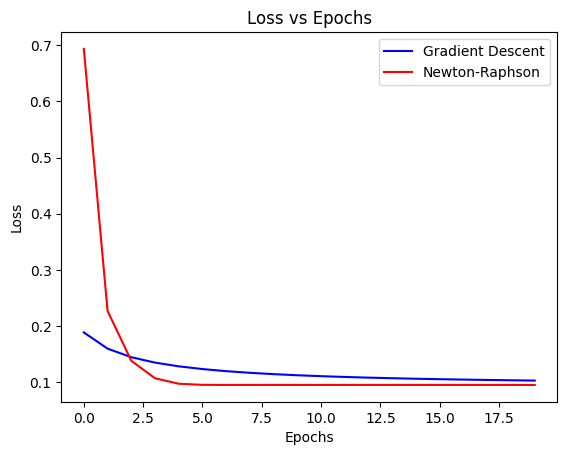

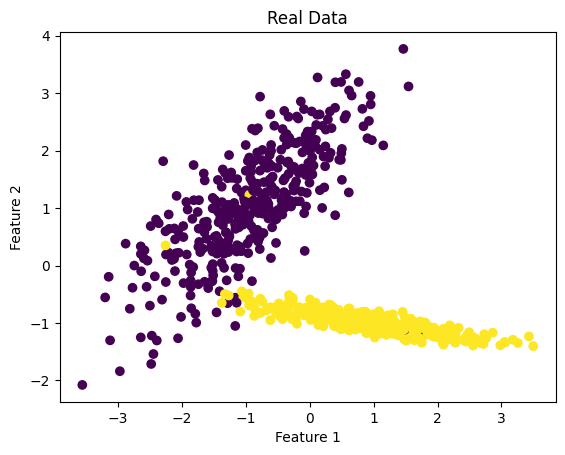

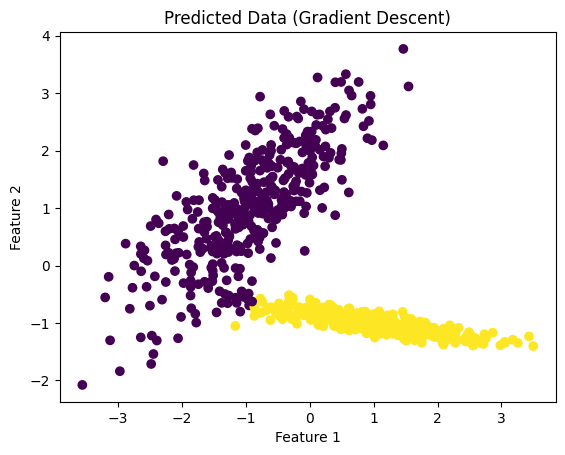

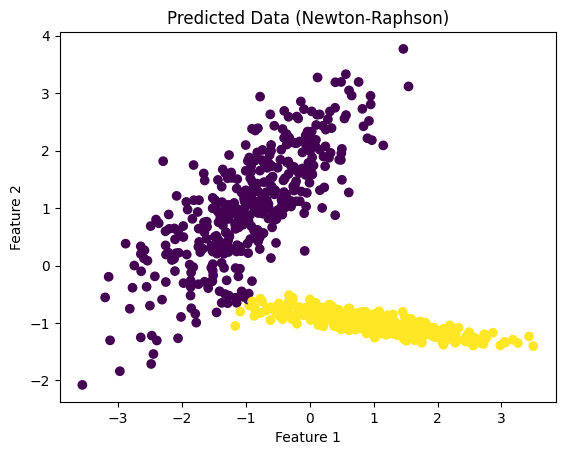

In [135]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=41)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def logistic_f(self, z):
        """Sigmoid function."""
        return 1 / (1 + np.exp(-z))
    
    def hypothesis(self, X):
        """Predict probabilities using current beta."""
        return self.logistic_f(np.dot(X, self.beta))
    
    def loss(self, y, y_predicted):
        """Compute binary cross-entropy loss."""
        eps = 1e-15
        return -np.mean(y * np.log(y_predicted + eps) + (1 - y) * np.log(1 - y_predicted + eps))
    
    def fit_GD(self, X, y):
        """Fit the model using gradient descent."""
        X = np.insert(X, 0, 1, axis=1)  
        self.m, self.n = X.shape
        self.beta = np.zeros(self.n)

        loss = []

        for _ in range(self.epochs):
            d_beta = np.dot(X.T, y - self.hypothesis(X))  
            self.beta += self.learning_rate * d_beta      

            y_predicted = self.hypothesis(X)
            loss.append(self.loss(y, y_predicted))
        
        return loss
    
    def fit_newton(self, X, y):
        """Fit the model using Newton-Raphson method."""
        X = np.insert(X, 0, 1, axis=1)  
        self.m, self.n = X.shape
        self.beta = np.zeros(self.n)

        loss = []

        for _ in range(self.epochs):
            y_predicted = self.hypothesis(X)
            d_beta = np.dot(X.T, y - y_predicted)  
            W = np.diag(y_predicted * (1 - y_predicted))  
            dd_beta = -np.dot(X.T, np.dot(W, X))          
            
            self.beta -= np.dot(np.linalg.inv(dd_beta), d_beta)  

            loss.append(self.loss(y, y_predicted))
        
        return loss

    def predict(self, X):
        """Predict class labels (0 or 1)."""
        X = np.insert(X, 0, 1, axis=1)  
        linear_model = np.dot(X, self.beta)
        y_predicted = self.logistic_f(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]
    
    def predict_proba(self, X):
        """Predict probabilities for both classes."""
        X = np.insert(X, 0, 1, axis=1)  
        linear_model = np.dot(X, self.beta)
        y_predicted = self.logistic_f(linear_model)
        return np.array([[1 - i, i] for i in y_predicted])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


lr_gd = LogisticRegression(learning_rate=0.01, epochs=20)
loss_gd = lr_gd.fit_GD(X_train, y_train)


lr_newton = LogisticRegression(learning_rate=0.01, epochs=20)
loss_newton = lr_newton.fit_newton(X_train, y_train)


y_pred_gd = lr_gd.predict(X_test)
y_pred_newton = lr_newton.predict(X_test)


def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print("Gradient Descent Accuracy:", accuracy(y_test, y_pred_gd))
print("Newton-Raphson Accuracy:", accuracy(y_test, y_pred_newton))


plt.plot(loss_gd, 'b', label='Gradient Descent')
plt.plot(loss_newton, 'r', label='Newton-Raphson')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Real Data')
plt.show()


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_gd)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Data (Gradient Descent)')
plt.show()


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_newton)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Data (Newton-Raphson)')
plt.show()

## Task 3: Classification for Imbalanced Data

Split the data using a technique suitable for imbalanced classes. Describe its working.

Train a logistic regression model on the below data.

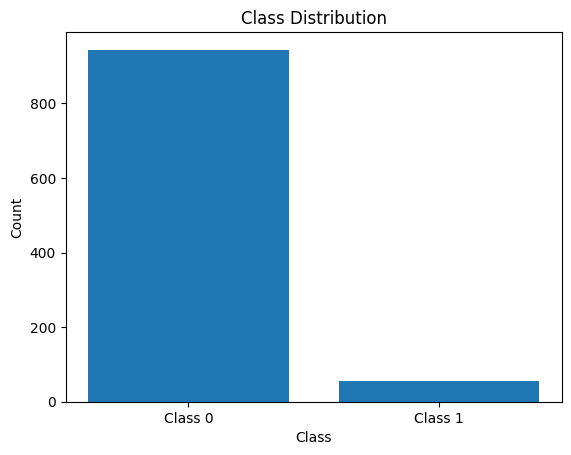

Dataset Shape: (1000, 20)
Class Distribution: [944  56]
Training set class distribution: [189  11]
Test set class distribution: [755  45]


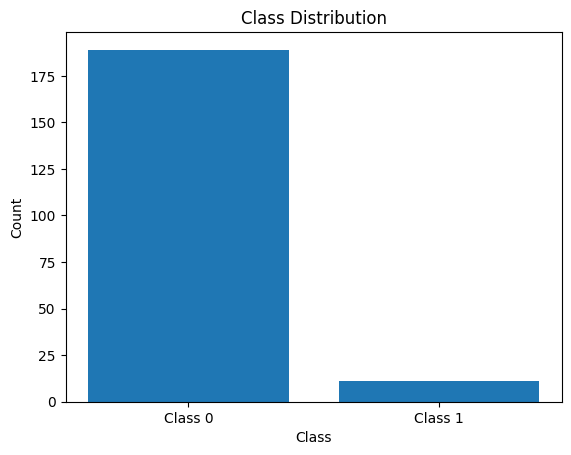

Epoch 0, Loss: 0.6931471805599435
Epoch 10, Loss: 0.5883885096844401
Epoch 20, Loss: 0.5294080124381547
Epoch 30, Loss: 0.4920455770227326
Epoch 40, Loss: 0.4657598490117735
Epoch 50, Loss: 0.4457057387896849
Epoch 60, Loss: 0.4294772534391296
Epoch 70, Loss: 0.4157874752946734
Epoch 80, Loss: 0.40390025687681885
Epoch 90, Loss: 0.3933678414917555
Accuracy: 0.8175


In [136]:
X, y = make_classification(
    n_samples=1000,
    n_informative=4, n_redundant=5, n_features=20, n_clusters_per_class=3,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

def visualize_class_distribution(y):
    plt.bar(['Class 0', 'Class 1'], [sum(y == 0), sum(y == 1)])
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

visualize_class_distribution(y)

print("Dataset Shape:", X.shape)
print("Class Distribution:", np.bincount(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)


print("Training set class distribution:", np.bincount(y_train))
print("Test set class distribution:", np.bincount(y_test))


visualize_class_distribution(y_train)

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        self.beta = np.zeros(self.n)

        for epoch in range(self.epochs):
            y_pred = self.sigmoid(np.dot(X, self.beta))
            gradient = np.dot(X.T, y - y_pred) / self.m
            self.beta += self.learning_rate * gradient  
            
            if epoch % 10 == 0:
                loss = self.loss(y, y_pred)
                print(f"Epoch {epoch}, Loss: {loss}")
    
    def loss(self, y, y_pred):
        eps = 1e-15
        return -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        y_pred = self.sigmoid(np.dot(X, self.beta))
        return (y_pred >= 0.5).astype(int)

    def predict_proba(self, X):
        X = np.insert(X, 0, 1, axis=1)
        
        linear_model = np.dot(X, self.beta)
        
        y_predicted_proba = self.sigmoid(linear_model)
        
        return np.array([[1 - p, p] for p in y_predicted_proba])

lr = LogisticRegressionGD(learning_rate=0.01, epochs=100)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print("Accuracy:", accuracy(y_test, y_pred))


Evaluate your binary classifiers using the following:
- confusion matrix,
- accuracy,
- precision,
- recall,
- F1 score,
- ROCAUC.

Please write custom functions calculating the above functions and plotting the receiver operating characteristic curve. Describe your intuition behind each metric and its suitability for imbalanced classes.



The confusion matrix shows how many samples were correctly or incorrectly classified into each class.


$$\text{Confusion Matrix} =
\begin{bmatrix}
\text{TP} & \text{FP} \\
\text{FN} & \text{TN}
\end{bmatrix}$$


Where:\
TP: True Positives (correctly classified as Class 1)\
FP: False Positives (incorrectly classified as Class 1)\
FN: False Negatives (incorrectly classified as Class 0)\
TN: True Negatives (correctly classified as Class 0)

------

$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total Samples}}$$


Accuracy is the proportion of correct predictions. It can be misleading for imbalanced datasets because a model could predict only the majority class and still achieve high accuracy.

------

3. Precision


$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$


Precision measures how many of the predicted positive samples are actually positive. High precision means fewer false positives.

-----

4. Recall


$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$


Recall (also called sensitivity) measures how many of the actual positive samples were correctly predicted. It is especially important in imbalanced datasets because it indicates how well the model identifies the minority class.

-----

5. F1 Score


$$\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$


The F1 score is the harmonic mean of precision and recall. It balances both metrics and is useful when the dataset is imbalanced.

------

6. ROC-AUC

The Receiver Operating Characteristic (ROC) curve plots the true positive rate (recall) against the false positive rate (FPR) at various classification thresholds. The Area Under the Curve (AUC) quantifies the overall ability of the classifier to distinguish between the classes.


$$\text{False Positive Rate} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$



$$\text{True Positive Rate} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \text{Recall}$$



In [137]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    return np.array([[TP, FP], [FN, TN]])

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return TP / (TP + FP + 1e-15)  

def recall(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP / (TP + FN + 1e-15)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-15)

def roc_auc(y_true, y_prob):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc_value = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_value:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc_value

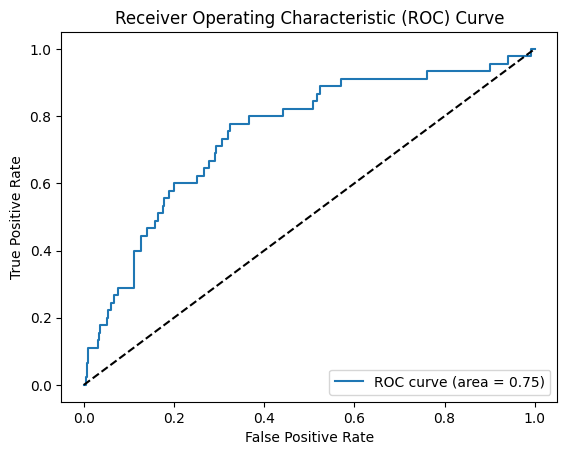

Confusion Matrix:
 [[ 22 123]
 [ 23 632]]
Accuracy: 0.8175
Precision: 0.1517
Recall: 0.4889
F1 Score: 0.2316
ROC-AUC: 0.7486


In [138]:
# Get predicted probabilities for ROC-AUC
y_prob = lr.predict_proba(X_test)[:, 1]  # Probability of Class 1

# Get predictions for metrics
y_pred = lr.predict(X_test)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred)
rec = recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_value = roc_auc(y_test, y_prob)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc_value:.4f}")

Propose, describe and implement a technique for improving the model's ability to distinguish the classes. Evaluate your approach.

Proposed Technique: Class Weighting

In imbalanced classification problems, models tend to be biased towards the majority class. To improve the model’s ability to distinguish between classes, class weighting can be applied. This technique assigns higher weights to the minority class during training, encouraging the model to pay more attention to it.


Description of the Approach
1.	Class Weighting:\
The fit method applies different weights to the samples based on their class.\
The weight for each sample is determined by class_weight, where a higher weight is assigned to the minority class (in this case, Class 1) and a lower weight to the majority class (Class 0).\
This modification adjusts the gradient calculation by multiplying the error term for each sample by its respective class weight.

2.	Gradient Update:\
The gradient of the loss function is scaled by the class weights. This adjustment ensures that the updates to the model parameters are influenced more by the minority class samples.


3.	Outcome:\
The model learns to focus more on correctly predicting the minority class, leading to potential improvements in metrics such as recall, F1-score, and ROC-AUC.

Epoch 0, Loss: 0.6931471805599435
Epoch 10, Loss: 0.5342295201065932
Epoch 20, Loss: 0.47164970562383635
Epoch 30, Loss: 0.4357836675872076
Epoch 40, Loss: 0.41074741817760385
Epoch 50, Loss: 0.3915123763083706
Epoch 60, Loss: 0.375967109319364
Epoch 70, Loss: 0.36301005237055234
Epoch 80, Loss: 0.351974403743442
Epoch 90, Loss: 0.34241752486126353


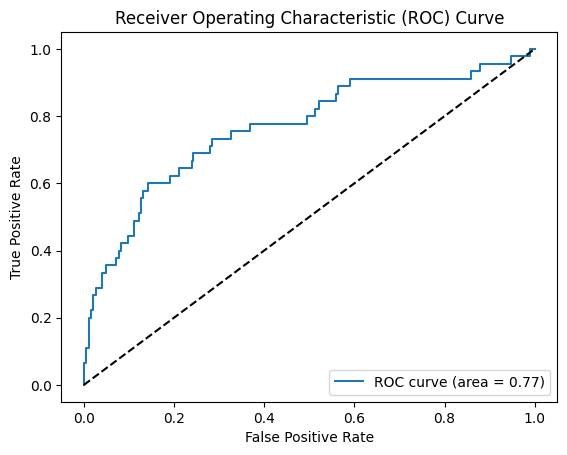

Confusion Matrix (Weighted):
 [[ 20  84]
 [ 25 671]]
Accuracy (Weighted): 0.8638
Precision (Weighted): 0.1923
Recall (Weighted): 0.4444
F1 Score (Weighted): 0.2685
ROC-AUC (Weighted): 0.7659


In [139]:
class LogisticRegressionGDWeighted(LogisticRegressionGD):
    def fit(self, X, y, class_weight=None):
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        self.beta = np.zeros(self.n)

        for epoch in range(self.epochs):
            y_pred = self.sigmoid(np.dot(X, self.beta))
            error = y - y_pred

            if class_weight:
                weights = np.where(y == 1, class_weight[1], class_weight[0])
                gradient = np.dot(X.T, weights * error) / self.m
            else:
                gradient = np.dot(X.T, error) / self.m

            self.beta += self.learning_rate * gradient
            
            if epoch % 10 == 0:
                loss = self.loss(y, y_pred)
                print(f"Epoch {epoch}, Loss: {loss}")

class_weights = {0: 2, 1: 5}  

lr_weighted = LogisticRegressionGDWeighted(learning_rate=0.01, epochs=100)

lr_weighted.fit(X_train, y_train, class_weight=class_weights)

y_prob_weighted = np.array([p[1] for p in lr_weighted.predict_proba(X_test)])
y_pred_weighted = lr_weighted.predict(X_test)

conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
acc_weighted = accuracy(y_test, y_pred_weighted)
prec_weighted = precision(y_test, y_pred_weighted)
rec_weighted = recall(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)
roc_auc_weighted = roc_auc(y_test, y_prob_weighted)

print("Confusion Matrix (Weighted):\n", conf_matrix_weighted)
print(f"Accuracy (Weighted): {acc_weighted:.4f}")
print(f"Precision (Weighted): {prec_weighted:.4f}")
print(f"Recall (Weighted): {rec_weighted:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")
print(f"ROC-AUC (Weighted): {roc_auc_weighted:.4f}")

## Task 4: Optimization of Neural Networks

The **backpropagation algorithm** is the foundational algorithm in deep learning. In this task You will have to go through a single iteration of said algorithm and compare the results after updating networks weights. <br>
You are given a neural network with one input layer consisting of two input nodes ${n_1, n_2}$, one hidden layer with two neurons ${n_3, n_4}$ and an output layer with a single node $n_5$. We will denote the weight connecting $n_i$ to $n_j$ as $w_{i,j}$. A bias related to $n_i$ will be denoted as $b_i$. Parameters are initialized as follows:
* $w_{1,3} = 1.5$ ; $w_{2,3} = -2.5$ ; $b_{3} = 0.3$
* $w_{1,4} = 1$ ; $w_{2,4} = -2.5$ ; $b_{4} = 0.2$
* $w_{3,5} = 4$ ; $w_{4,5} = 3$ ; $b_{5} = -0.8$ <br>

Additionally, neurons $n_3$ and $n_4$ are equipped with the sigmoid activation function: $\sigma(x) = \frac{1}{1+e^{-x}} $<br>
Your task is to use two training examples: $x = \{ (1,2), (2,0)\}$, $y = \{-1, 6\}$ to preform a single backpropagation step - preform forward calculations and propagate the received error backwards, updating the weights. After all weights have been updated, check how the predictions change, preforming additional forward pass.

In [140]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

weights = {
    'w13': 1.5,
    'w23': -2.5,
    'w14': 1,
    'w24': -2.5,
    'w35': 4,
    'w45': 3
}

biases = {
    'b3': 0.3,
    'b4': 0.2,
    'b5': -0.8
}

Input = np.array([[1, 2], [2, 0]])
Observed = np.array([-1, 6])

alpha = 0.1

def forward_pass(Input, weights, biases):
    x3 = Input[:, 0] * weights['w13'] + Input[:, 1] * weights['w23'] + biases['b3']
    x4 = Input[:, 0] * weights['w14'] + Input[:, 1] * weights['w24'] + biases['b4']
    y3 = sigmoid(x3)
    y4 = sigmoid(x4)
    y5 = y3 * weights['w35'] + y4 * weights['w45'] + biases['b5']
    return x3, x4, y3, y4, y5

def backward_pass(Input, Observed, x3, x4, y3, y4, y5, weights, biases, alpha):
    delta_b5 = y5 - Observed

    delta_w35 = delta_b5 * y3
    delta_w45 = delta_b5 * y4

    delta_b3 = delta_b5 * weights['w35'] * sigmoid_derivative(x3)
    delta_b4 = delta_b5 * weights['w45'] * sigmoid_derivative(x4)

    delta_w13 = delta_b3 * Input[:, 0]
    delta_w23 = delta_b3 * Input[:, 1]

    delta_w14 = delta_b4 * Input[:, 0]
    delta_w24 = delta_b4 * Input[:, 1]

    weights['w35'] -= alpha * np.sum(delta_w35)
    weights['w45'] -= alpha * np.sum(delta_w45)
    biases['b5'] -= alpha * np.sum(delta_b5)

    weights['w13'] -= alpha * np.sum(delta_w13)
    weights['w23'] -= alpha * np.sum(delta_w23)
    biases['b3'] -= alpha * np.sum(delta_b3)

    weights['w14'] -= alpha * np.sum(delta_w14)
    weights['w24'] -= alpha * np.sum(delta_w24)
    biases['b4'] -= alpha * np.sum(delta_b4)

x3, x4, y3, y4, y5 = forward_pass(Input, weights, biases)
print("Initial predictions:", y5)
backward_pass(Input, Observed, x3, x4, y3, y4, y5, weights, biases, alpha)
print("Updated weights:", weights)
x3, x4, y3, y4, y5 = forward_pass(Input, weights, biases)
print("Updated predictions:", y5)

for _ in range(1000):
    x3, x4, y3, y4, y5 = forward_pass(Input, weights, biases)
    backward_pass(Input, Observed, x3, x4, y3, y4, y5, weights, biases, alpha)

print("Final weights:", weights)
print("Final predictions:", forward_pass(Input, weights, biases)[-1])

Initial predictions: [-0.5776933   5.75846378]
Updated weights: {'w13': np.float64(1.5002720308150628), 'w23': np.float64(-2.5127137186501787), 'w14': np.float64(1.0103024961062157), 'w24': np.float64(-2.5054230467043723), 'w35': np.float64(4.021640454638961), 'w45': np.float64(3.020820226051236)}
Updated predictions: [-0.59846912  5.78621051]
Final weights: {'w13': np.float64(1.5052450705180425), 'w23': np.float64(-2.6857013703437547), 'w14': np.float64(1.1216086395592384), 'w24': np.float64(-2.5963549611022487), 'w35': np.float64(4.302707187778887), 'w45': np.float64(3.292798263706503)}
Final predictions: [-1.  6.]


## Task 5: L1 & L2 Regularization for Logistic Regression

In this task we will use a synthetic dataset generated by the function `make_classification`.

1. Use a pairplot to see the relationships between the features in the dataset.
2. Apply your logistic regression model from Task 1 on this dataset and measure its accuracy.
3. Modify your implementation to account for two regularization methods: L1 and L2 and apply them to the dataset. What can you observe?
4. Which features are selected by L1 regularization? Plot the decision boundary for these features.

(If you have not done Task 1, use `LogisticRegression` from `sklearn` to see the effects of regularization. You can get half of the points for this task if you do that.)

In [154]:

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=41
)

dataset = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 21)])
dataset['Target'] = y

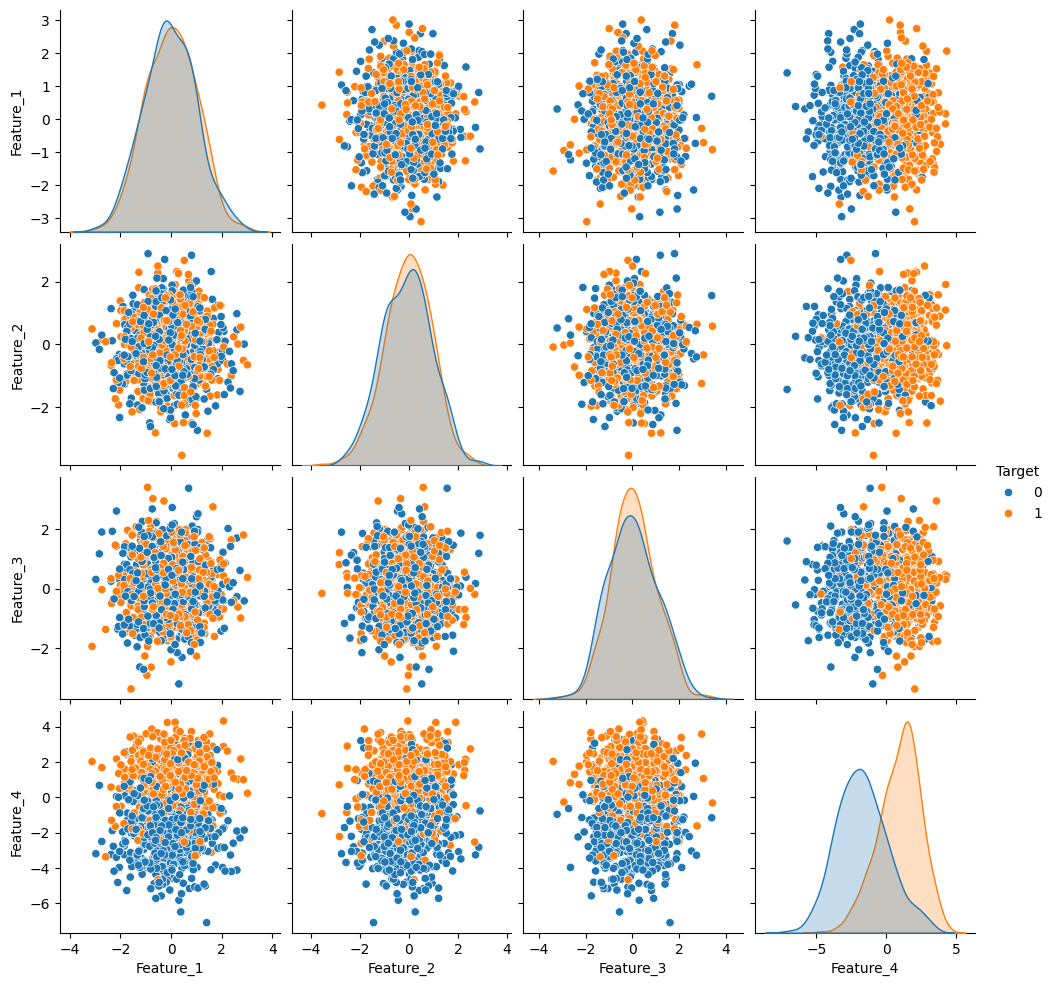

In [155]:
import seaborn as sns

# Select a subset of features to visualize
subset = dataset[["Feature_1", "Feature_2", "Feature_3", "Feature_4", "Target"]]
sns.pairplot(subset, hue="Target", diag_kind="kde")
plt.show()

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(learning_rate=0.01, epochs=100)
loss_history = lr.fit_GD(X_train, y_train)

y_pred = lr.predict(X_test)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7700


In [157]:
class LogisticRegressionL1(LogisticRegression):
    def fit_GD(self, X, y, alpha=0.1):
        """Fit model using L1 regularization."""
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        self.beta = np.zeros(self.n)

        for _ in range(self.epochs):
            d_beta = np.dot(X.T, y - self.hypothesis(X))
            
            self.beta += self.learning_rate * d_beta - alpha * np.sign(self.beta)

class LogisticRegressionL2(LogisticRegression):
    def fit_GD(self, X, y, alpha=0.1):
        """Fit model using L2 regularization."""
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        self.beta = np.zeros(self.n)

        for _ in range(self.epochs):
            d_beta = np.dot(X.T, y - self.hypothesis(X))
            
            # Apply L2 regularization
            self.beta += self.learning_rate * d_beta - alpha * self.beta

In [158]:
lr_l1 = LogisticRegressionL1(learning_rate=0.01, epochs=10000)
loss_l1 = lr_l1.fit_GD(X_train, y_train, alpha=0.1)

lr_l2 = LogisticRegressionL2(learning_rate=0.01, epochs=10000)
loss_l2 = lr_l2.fit_GD(X_train, y_train, alpha=0.1)

y_pred_l1 = lr_l1.predict(X_test)
y_pred_l2 = lr_l2.predict(X_test)

acc_l1 = accuracy(y_test, y_pred_l1)
acc_l2 = accuracy(y_test, y_pred_l2)

print(f"Accuracy with L1 regularization: {acc_l1:.4f}")
print(f"Accuracy with L2 regularization: {acc_l2:.4f}")

Accuracy with L1 regularization: 0.8600
Accuracy with L2 regularization: 0.8350


In [159]:
selected_features = np.where(lr_l1.beta != 0)[0]
print(f"Selected features by L1 regularization: {selected_features}")

Selected features by L1 regularization: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [160]:
def plot_decision_boundary(feature_1, feature_2, X, y, model):
    x_min, x_max = X[:, feature_1].min() - 0.5, X[:, feature_1].max() + 0.5
    y_min, y_max = X[:, feature_2].min() - 0.5, X[:, feature_2].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    X_mesh_full = np.zeros((X_mesh.shape[0], X.shape[1]))
    X_mesh_full[:, feature_1] = X_mesh[:, 0]
    X_mesh_full[:, feature_2] = X_mesh[:, 1]

    Z = model.predict(X_mesh_full)
    Z = np.array(Z).reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, feature_1], X[:, feature_2], c=y, alpha=0.8)
    plt.xlabel(f'Feature {feature_1 + 1}')
    plt.ylabel(f'Feature {feature_2 + 1}')
    plt.title('Decision Boundary with L1 Regularization')
    plt.colorbar()
    plt.show()

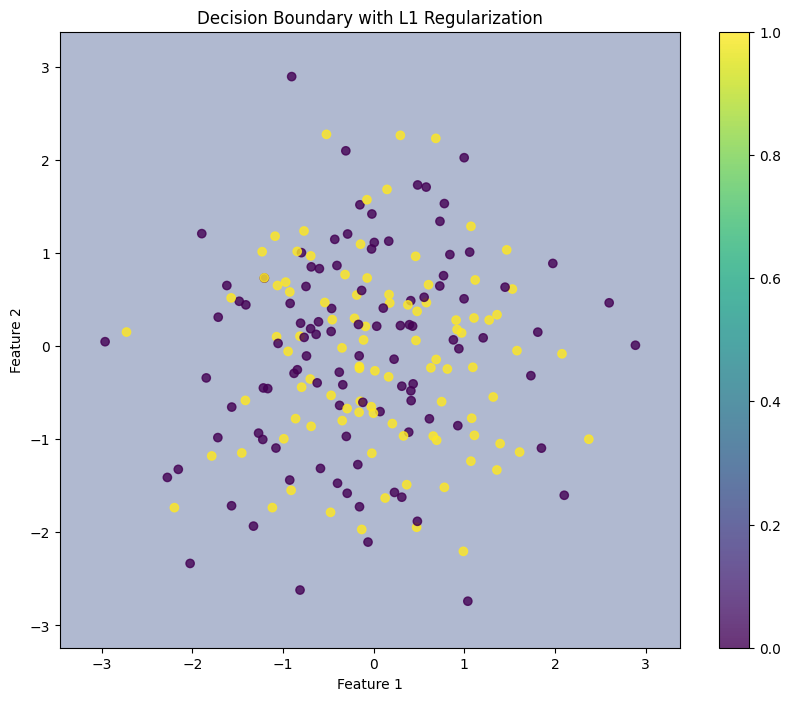

In [161]:
plot_decision_boundary(0, 1, X_test, y_test, lr_l1)

In [162]:
def plot_decision_boundary_all_features(X, y, model):
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    axes = axes.ravel()
    
    for i in range(X.shape[1]):
        x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
        y_min, y_max = X[:, i].min() - 1, X[:, i].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        X_grid = np.c_[xx.ravel(), yy.ravel()]
        X_grid_full = np.zeros((X_grid.shape[0], X.shape[1]))
        X_grid_full[:, i] = X_grid[:, 0]
        
        Z = model.predict(X_grid_full)
        Z = np.array(Z).reshape(xx.shape)
        
        axes[i].contourf(xx, yy, Z, alpha=0.8)
        next_feature = (i+1) % X.shape[1]
        axes[i].scatter(X[:, i], X[:, next_feature], c=y, edgecolors='k', marker='o')
        axes[i].set_xlabel(f'Feature {i}')
        axes[i].set_ylabel(f'Feature {next_feature}')
        axes[i].set_title(f'Decision Boundary for Feature {i + 1}')
    
    plt.tight_layout()
    plt.show()


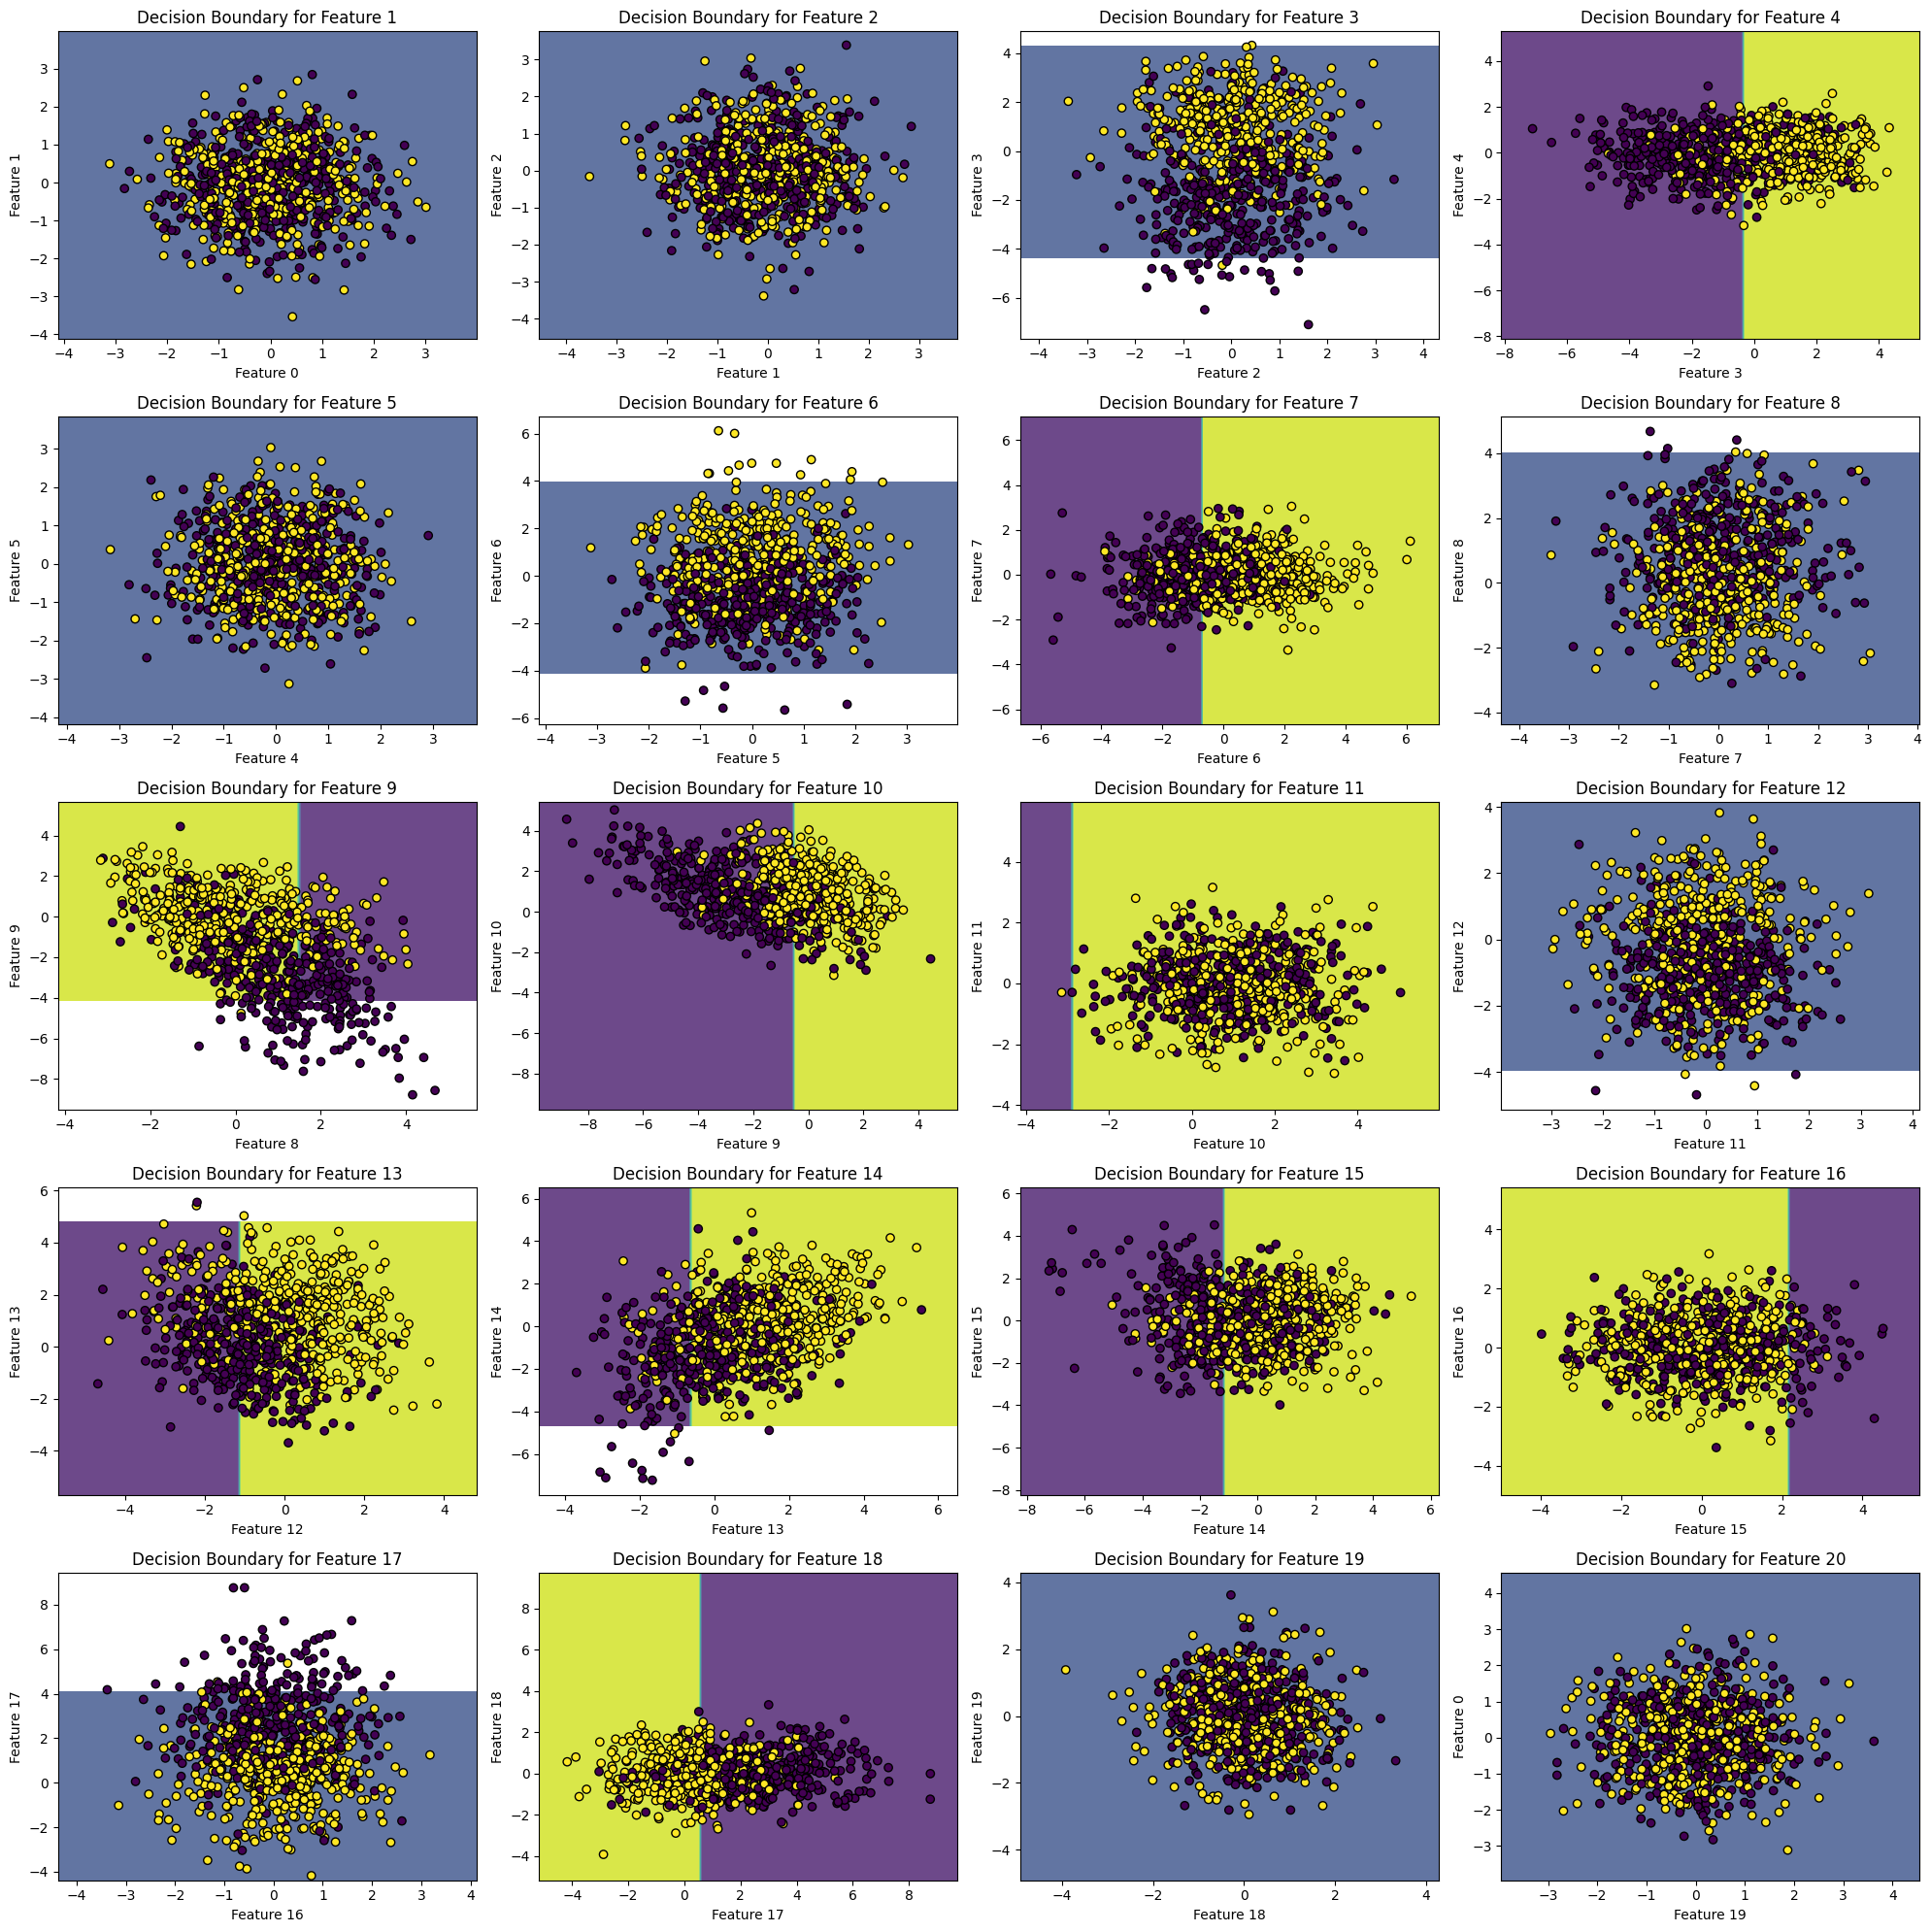

In [163]:
plot_decision_boundary_all_features(X_train, y_train, lr_l1)

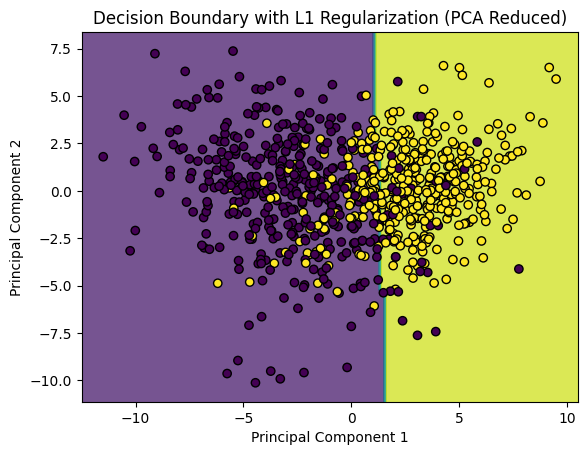

In [164]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train)


x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]


Z = np.array(lr_l1.predict(pca.inverse_transform(grid_points)))
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.75)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
plt.title("Decision Boundary with L1 Regularization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()